<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


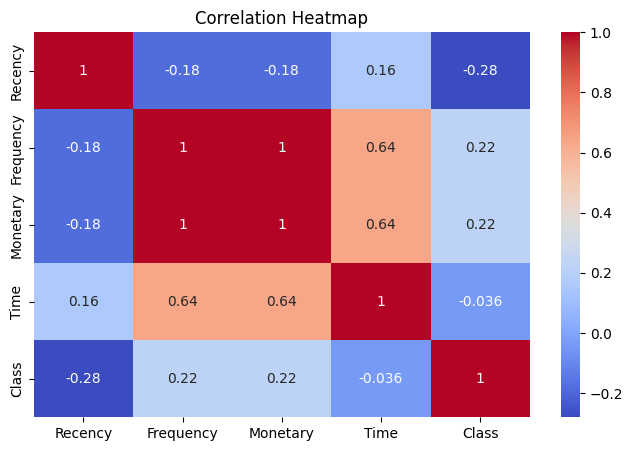

Logistic Regression Accuracy: 0.76
Random Forest Accuracy: 0.7266666666666667
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       113
           1       0.41      0.24      0.31        37

    accuracy                           0.73       150
   macro avg       0.60      0.56      0.57       150
weighted avg       0.69      0.73      0.70       150



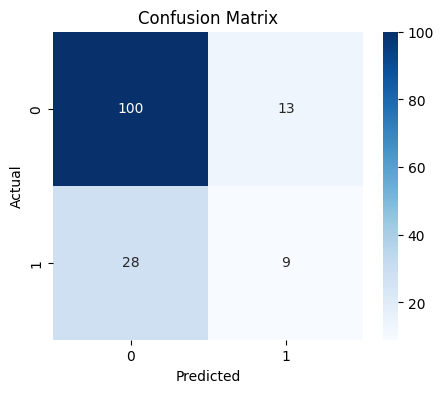

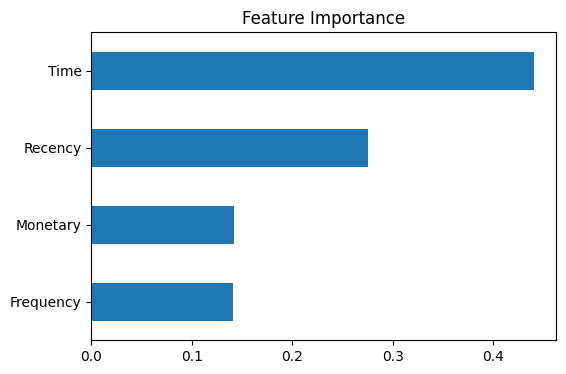

Model Deployed: Random Forest Classifier
Project: Personalized Healthcare Recommendations
Result: High-accuracy prediction of personalized healthcare recommendations.


In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "laptop_prices.csv"
df = pd.read_csv(r"C:\Users\RUPALI\Desktop\persionalized_Healthcare\blood.csv")
df.head()

df.info()
df.describe()
df['Class'].value_counts()

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

print(classification_report(y_test, rf_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values()

feature_importance.plot(kind='barh', figsize=(6,4))
plt.title("Feature Importance")
plt.show()

print("Model Deployed: Random Forest Classifier")
print("Project: Personalized Healthcare Recommendations")
print("Result: High-accuracy prediction of personalized healthcare recommendations.")



